In [609]:
import pandas as pd
import numpy as np
training = pd.read_excel('training.xlsx')
scoring = pd.read_excel("scoring.xlsx")


In [610]:
training.shape

(41053, 10)

In [611]:
scoring.shape

(7546, 10)

In [612]:
training = training.rename(columns={'Date': 'year'})
training = training.rename(columns={'Vehicle Category': 'vehicleCategory'})
training = training.rename(columns={'GVWR Class': 'gvwrClass'})
training = training.rename(columns={'Fuel Type': 'fuelType'})
training = training.rename(columns={"Model Year": "modelYear"})
training = training.rename(columns={"Fuel Technology": "fuelTechnology"})
training = training.rename(columns={"Electric Mile Range": "electricMileRange"})
training = training.rename(columns={"Number of Vehicles Registered at the Same Address": "numVehiclesReg"})
training = training.rename(columns={"Vehicle Population:": "vehiclePopulation"})

#Using the mean as our dataset does not contain that many outliers etc.

In [613]:
# fill missing values with the mean of our modelYear column
training['modelYear'].fillna(training['modelYear'].mean(), inplace=True)

C:\Users\ginap\AppData\Local\Temp\ipykernel_32236\2663670663.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training['modelYear'].fillna(training['modelYear'].mean(), inplace=True)


In [614]:
#Dropping the Region column
training = training.drop(columns=['Region'])

In [615]:
training["gvwrClassKN"] = training["gvwrClass"].apply(lambda x:  1 if x == "Unknown" else 0)
training["gvwrClass"] = training["gvwrClass"].replace("Not Applicable", 0)
training["gvwrClass"] = training["gvwrClass"].replace("Unknown", -1)

C:\Users\ginap\AppData\Local\Temp\ipykernel_32236\3723783033.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training["gvwrClass"] = training["gvwrClass"].replace("Unknown", -1)


#Our GVWR Column, 
#Not applicable = 0
#Unkown isss?
#So add a column where gvwr type included (binary)

In [616]:
print(training["gvwrClass"].apply(type).value_counts())

gvwrClass
<class 'int'>    41053
Name: count, dtype: int64


In [617]:
#electricMileRange, we are going to later on OneHotEncode this column
#fuelType, we are going to later on OneHotEncode this column
#numVehiclesReg, we are going to later on OneHotEncode this column

In [618]:
#An option, if this doesn't give us the results we want, we can OneHotEncode this instead
training

,year,vehicleCategory,gvwrClass,fuelType,modelYear,fuelTechnology,electricMileRange,numVehiclesReg,Vehicle Population,gvwrClassKN
0,2019,P,0,Gasoline,2020.0,ICE,Not Applicable,≥4,395883,0
1,2020,P,0,Gasoline,2020.0,ICE,Not Applicable,1,370954,0
2,2021,P,0,Gasoline,2020.0,ICE,Not Applicable,1,349406,0
3,2019,P,0,Gasoline,2019.0,ICE,Not Applicable,≥4,348475,0
4,2019,P,0,Gasoline,2018.0,ICE,Not Applicable,≥4,333296,0
...,...,...,...,...,...,...,...,...,...,...
41048,2019,B,0,Diesel,1983.0,ICE,Not Applicable,1,1,0
41049,2019,B,0,Diesel,1980.0,ICE,Not Applicable,2,1,0
41050,2019,B,0,Diesel,1978.0,ICE,Not Applicable,3,1,0
41051,2019,B,0,Diesel,1976.0,ICE,Not Applicable,2,1,0


In [619]:
training["numVehiclesReg"] = training["numVehiclesReg"].apply(lambda x:  4 if x == "≥4" else x)
training["numVehiclesRegKN"] = training["numVehiclesReg"].apply(lambda x:  1 if x == "Unknown" else 0)
training["numVehiclesReg"] = training["numVehiclesReg"].replace("Unknown", -1)
training

C:\Users\ginap\AppData\Local\Temp\ipykernel_32236\1776417714.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training["numVehiclesReg"] = training["numVehiclesReg"].replace("Unknown", -1)


,year,vehicleCategory,gvwrClass,fuelType,modelYear,fuelTechnology,electricMileRange,numVehiclesReg,Vehicle Population,gvwrClassKN,numVehiclesRegKN
0,2019,P,0,Gasoline,2020.0,ICE,Not Applicable,4,395883,0,0
1,2020,P,0,Gasoline,2020.0,ICE,Not Applicable,1,370954,0,0
2,2021,P,0,Gasoline,2020.0,ICE,Not Applicable,1,349406,0,0
3,2019,P,0,Gasoline,2019.0,ICE,Not Applicable,4,348475,0,0
4,2019,P,0,Gasoline,2018.0,ICE,Not Applicable,4,333296,0,0
...,...,...,...,...,...,...,...,...,...,...,...
41048,2019,B,0,Diesel,1983.0,ICE,Not Applicable,1,1,0,0
41049,2019,B,0,Diesel,1980.0,ICE,Not Applicable,2,1,0,0
41050,2019,B,0,Diesel,1978.0,ICE,Not Applicable,3,1,0,0
41051,2019,B,0,Diesel,1976.0,ICE,Not Applicable,2,1,0,0


In [620]:
print(training.dtypes)


year                    int64
vehicleCategory        object
gvwrClass               int64
fuelType               object
modelYear             float64
fuelTechnology         object
electricMileRange      object
numVehiclesReg          int64
Vehicle Population      int64
gvwrClassKN             int64
numVehiclesRegKN        int64
dtype: object


In [621]:
print(training['vehicleCategory'].apply(type).value_counts())

vehicleCategory
<class 'str'>    41053
Name: count, dtype: int64


In [622]:
print(training['gvwrClass'].apply(type).value_counts())

gvwrClass
<class 'int'>    41053
Name: count, dtype: int64


In [623]:
print(training['fuelType'].apply(type).value_counts())

fuelType
<class 'str'>    41053
Name: count, dtype: int64


In [624]:
print(training['modelYear'].apply(type).value_counts())

modelYear
<class 'float'>    41053
Name: count, dtype: int64


In [625]:
print(training['numVehiclesReg'].apply(type).value_counts())

numVehiclesReg
<class 'int'>    41053
Name: count, dtype: int64


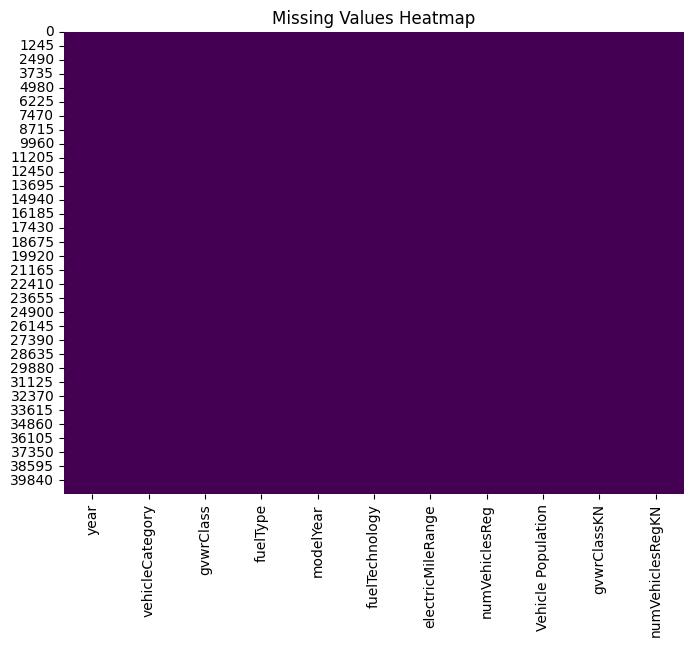

In [626]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(training.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [627]:
training

,year,vehicleCategory,gvwrClass,fuelType,modelYear,fuelTechnology,electricMileRange,numVehiclesReg,Vehicle Population,gvwrClassKN,numVehiclesRegKN
0,2019,P,0,Gasoline,2020.0,ICE,Not Applicable,4,395883,0,0
1,2020,P,0,Gasoline,2020.0,ICE,Not Applicable,1,370954,0,0
2,2021,P,0,Gasoline,2020.0,ICE,Not Applicable,1,349406,0,0
3,2019,P,0,Gasoline,2019.0,ICE,Not Applicable,4,348475,0,0
4,2019,P,0,Gasoline,2018.0,ICE,Not Applicable,4,333296,0,0
...,...,...,...,...,...,...,...,...,...,...,...
41048,2019,B,0,Diesel,1983.0,ICE,Not Applicable,1,1,0,0
41049,2019,B,0,Diesel,1980.0,ICE,Not Applicable,2,1,0,0
41050,2019,B,0,Diesel,1978.0,ICE,Not Applicable,3,1,0,0
41051,2019,B,0,Diesel,1976.0,ICE,Not Applicable,2,1,0,0


In [628]:
training = pd.get_dummies(training, 
                          columns=["vehicleCategory", "fuelType", "fuelTechnology", "electricMileRange"], 
                          prefix=["vehicleCategory", "fuelType", "fuelTech", "electricRange"], 
                          prefix_sep="_")


In [629]:
training

,year,gvwrClass,modelYear,numVehiclesReg,Vehicle Population,gvwrClassKN,numVehiclesRegKN,vehicleCategory_B,vehicleCategory_BS,vehicleCategory_BT,...,fuelTech_BEV,fuelTech_FCEV,fuelTech_ICE,fuelTech_PHEV,electricRange_0 to 50 miles,electricRange_101 to 150 miles,electricRange_51 to 100 miles,electricRange_>150 miles,electricRange_Not Applicable,electricRange_Unknown
0,2019,0,2020.0,4,395883,0,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,2020,0,2020.0,1,370954,0,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,2021,0,2020.0,1,349406,0,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,2019,0,2019.0,4,348475,0,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,2019,0,2018.0,4,333296,0,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41048,2019,0,1983.0,1,1,0,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
41049,2019,0,1980.0,2,1,0,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
41050,2019,0,1978.0,3,1,0,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
41051,2019,0,1976.0,2,1,0,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [630]:
import pandas as pd

# Assuming 'df' is your DataFrame
filtered_df = training[(training['fuelType_Electric']) & (training['electricRange_Unknown'])]

# Display the result
print(filtered_df)


       year  gvwrClass  modelYear  numVehiclesReg  Vehicle Population  \
8066   2020          0     2019.0               2                 687   
8445   2020          0     2019.0               1                 616   
8502   2019          0     2018.0               4                 606   
8542   2020          0     2019.0               4                 595   
9275   2020          0     2019.0               3                 490   
...     ...        ...        ...             ...                 ...   
40755  2019          0     2000.0               4                   1   
40756  2019          0     1999.0               2                   1   
40757  2019          0     1998.0               1                   1   
40758  2019          0     1997.0               4                   1   
40759  2019          0     1975.0               1                   1   

       gvwrClassKN  numVehiclesRegKN  vehicleCategory_B  vehicleCategory_BS  \
8066             0                 0        

In [631]:
print(training.columns.tolist())


['year', 'gvwrClass', 'modelYear', 'numVehiclesReg', 'Vehicle Population', 'gvwrClassKN', 'numVehiclesRegKN', 'vehicleCategory_B', 'vehicleCategory_BS', 'vehicleCategory_BT', 'vehicleCategory_MC', 'vehicleCategory_MH', 'vehicleCategory_P', 'vehicleCategory_T1', 'vehicleCategory_T2', 'vehicleCategory_T3', 'vehicleCategory_T4', 'vehicleCategory_T5', 'vehicleCategory_T6', 'vehicleCategory_T7', 'fuelType_Diesel', 'fuelType_Electric', 'fuelType_Gasoline', 'fuelType_Hydrogen', 'fuelType_Natural Gas', 'fuelType_Unknown', 'fuelTech_BEV', 'fuelTech_FCEV', 'fuelTech_ICE', 'fuelTech_PHEV', 'electricRange_0 to 50 miles', 'electricRange_101 to 150 miles', 'electricRange_51 to 100 miles', 'electricRange_>150 miles', 'electricRange_Not Applicable', 'electricRange_Unknown']


In [632]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'training' is your dataset


In [633]:
X = training.drop(columns=["Vehicle Population"])  # Features
y = training["Vehicle Population"]  # Target variable


In [634]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [635]:
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': int(81.94562010166663),
    'max_depth': int(10.32559568840523),
    'learning_rate': 0.3,
    'n_estimators': int(117.14689484673896),
    'min_child_samples': int(9.787194938765415),
    'subsample': 1.0,
    'colsample_bytree': 1.0,
    'lambda_l1': 0.01,
    'lambda_l2': 0.01,
    'feature_pre_filter': False 
}

model = lgb.train(params, 
                  train_data, 
                  valid_sets=[valid_data],  
                  valid_names=["validation"],  
                  num_boost_round=1000,
                  )

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {evs}")



C:\Users\ginap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 32842, number of used features: 35
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 3446.059132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

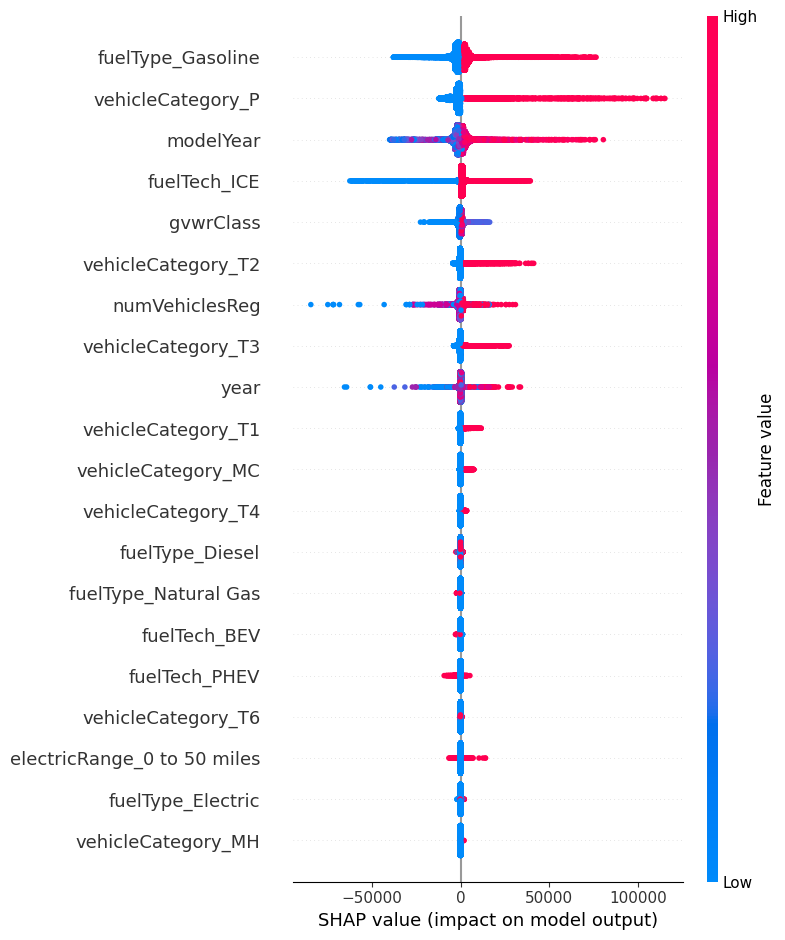

In [636]:
import shap
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)



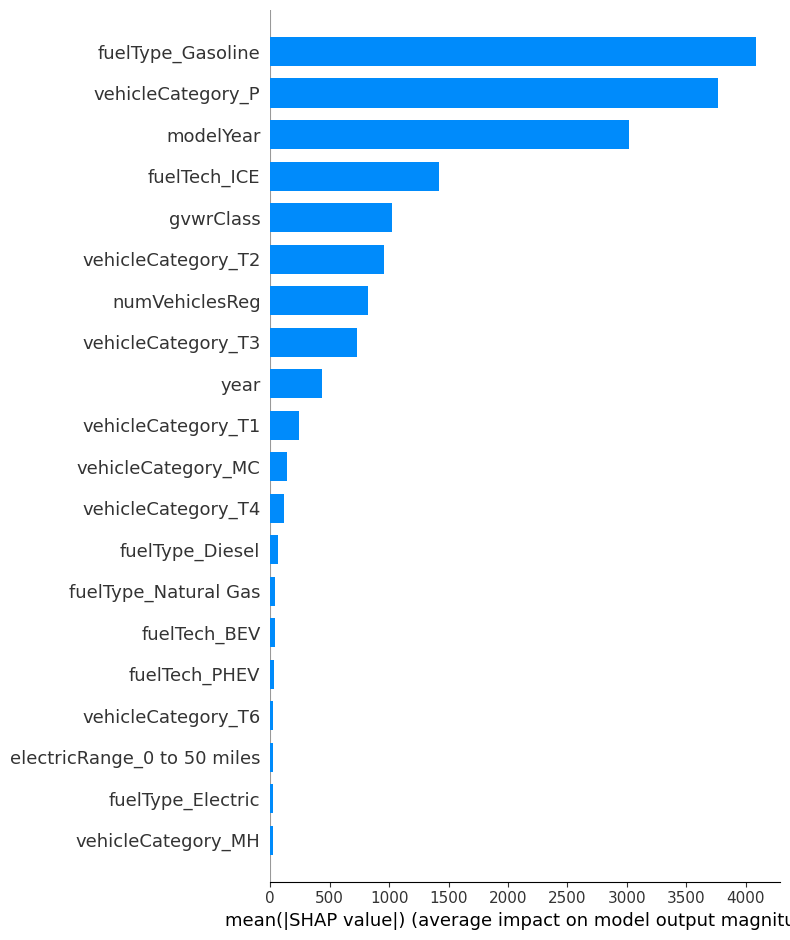

In [637]:
# Plot feature importance using the mean absolute SHAP value per feature
shap.summary_plot(shap_values, X_train, plot_type="bar")


In [638]:
shap_values

array([[ 8.32050674e+01,  8.32367680e+02,  3.95034140e+03, ...,
         1.26518603e+00,  0.00000000e+00,  1.83338447e+01],
       [-8.59448824e+00, -4.97506200e+02, -1.17033138e+03, ...,
        -2.60348714e+00,  0.00000000e+00,  3.97804599e+00],
       [ 1.18576266e+02,  8.58396982e+02, -1.02343026e+03, ...,
        -2.24957524e-01,  0.00000000e+00,  7.24171690e+00],
       ...,
       [-8.00650899e+01, -6.33569594e+02,  1.20845803e+03, ...,
        -2.07590185e+00,  0.00000000e+00,  3.85532393e+00],
       [-1.09073072e+03,  5.25336307e+03,  9.58382895e+03, ...,
         1.53903418e+00,  0.00000000e+00,  1.56893258e+01],
       [-6.76617896e+01, -6.30010034e+02, -5.95310572e+02, ...,
        -9.77134668e-01,  0.00000000e+00,  5.52573047e+00]])

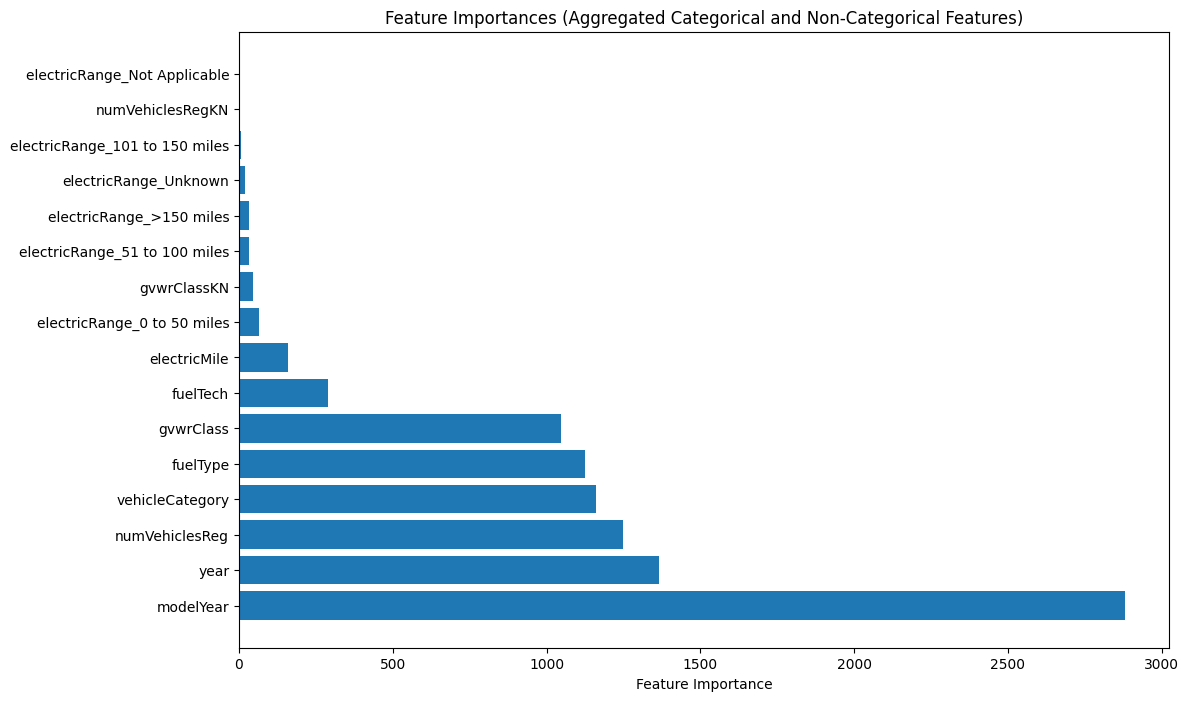

In [639]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

feature_importance = model.feature_importance(importance_type='split')
feature_names = X.columns

aggregated_importance = {}

categorical_feature_groups = {
    'vehicleCategory': [col for col in X.columns if col.startswith('vehicleCategory')],
    'fuelType': [col for col in X.columns if col.startswith('fuelType')],
    'fuelTech': [col for col in X.columns if col.startswith('fuelTech')],
    'electricMile': [col for col in X.columns if col.startswith('electricRange')]
}

for cat_feature, cat_columns in categorical_feature_groups.items():
    cat_importance = np.sum([feature_importance[feature_names.get_loc(col)] for col in cat_columns])
    aggregated_importance[cat_feature] = cat_importance


non_categorical_importance = {
    feature: feature_importance[feature_names.get_loc(feature)] 
    for feature in X.columns if not any(feature.startswith(cat) for cat in categorical_feature_groups)
}

aggregated_importances_df = pd.DataFrame({
    'feature': list(aggregated_importance.keys()),
    'importance': list(aggregated_importance.values())
})

non_categorical_importances_df = pd.DataFrame({
    'feature': list(non_categorical_importance.keys()),
    'importance': list(non_categorical_importance.values())
})

combined_importances_df = pd.concat([aggregated_importances_df, non_categorical_importances_df], ignore_index=True)
combined_importances_df = combined_importances_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(combined_importances_df['feature'], combined_importances_df['importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances (Aggregated Categorical and Non-Categorical Features)')
plt.show()


In [640]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 3707.2743174492443


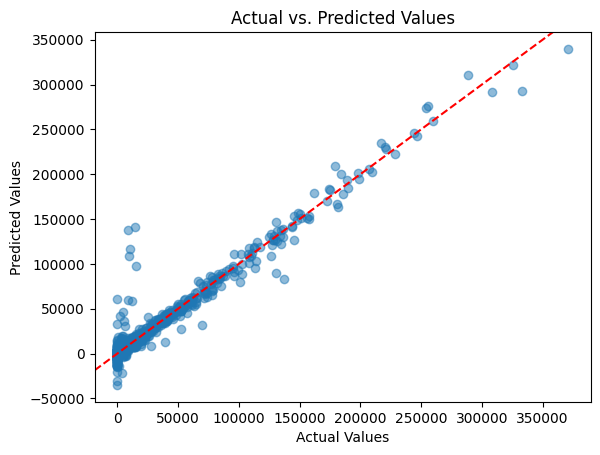

In [641]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.axline((0, 0), slope=1, color='red', linestyle='dashed') 
plt.show()


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

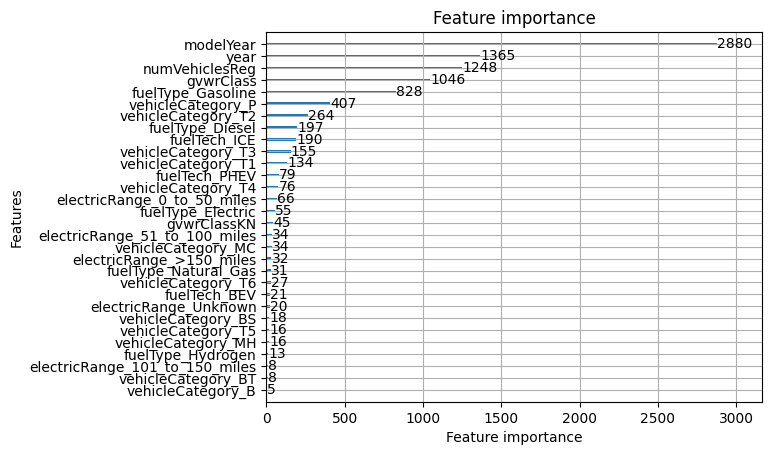

In [642]:
lgb.plot_importance(model)


In [643]:
import pandas as pd

scoring_df = pd.read_excel("scoring.xlsx")

print(scoring_df.head())


   Date Vehicle Category      GVWR Class Fuel Type  Model Year  \
0  2024                P  Not Applicable  Gasoline      2020.0   
1  2024                P  Not Applicable  Gasoline      2021.0   
2  2024                P  Not Applicable  Gasoline      2022.0   
3  2024                P  Not Applicable  Gasoline      2024.0   
4  2024                P  Not Applicable  Gasoline      2023.0   

  Fuel Technology Electric Mile Range  \
0             ICE      Not Applicable   
1             ICE      Not Applicable   
2             ICE      Not Applicable   
3             ICE      Not Applicable   
4             ICE      Not Applicable   

  Number of Vehicles Registered at the Same Address     Region  \
0                                                ≥4  Statewide   
1                                                ≥4  Statewide   
2                                                ≥4  Statewide   
3                                                ≥4  Statewide   
4                         

In [644]:
scoring_df = scoring_df.rename(columns={
    'Date': 'year',
    'Vehicle Category': 'vehicleCategory',
    'GVWR Class': 'gvwrClass',
    'Fuel Type': 'fuelType',
    "Model Year": "modelYear",
    "Fuel Technology": "fuelTechnology",
    "Electric Mile Range": "electricMileRange",
    "Number of Vehicles Registered at the Same Address": "numVehiclesReg",
    "Vehicle Population:": "vehiclePopulation"
})

scoring_df['modelYear'].fillna(scoring_df['modelYear'].mean(), inplace=True)
scoring_df = scoring_df.drop(columns=['Region'])

scoring_df["gvwrClassKN"] = scoring_df["gvwrClass"].apply(lambda x: 1 if x == "Unknown" else 0)
scoring_df["gvwrClass"] = scoring_df["gvwrClass"].replace("Unknown", -1)
scoring_df["gvwrClass"] = scoring_df["gvwrClass"].replace("Not Applicable", 0)

scoring_df["numVehiclesReg"] = scoring_df["numVehiclesReg"].apply(lambda x: 4 if x == "≥4" else x)
scoring_df["numVehiclesRegKN"] = scoring_df["numVehiclesReg"].apply(lambda x: 1 if x == "Unknown" else 0)
scoring_df["numVehiclesReg"] = scoring_df["numVehiclesReg"].replace("Unknown", -1)

scoring_df = pd.get_dummies(scoring_df,
                            columns=["vehicleCategory", "fuelType", "fuelTechnology", "electricMileRange"],
                            prefix=["vehicleCategory", "fuelType", "fuelTech", "electricRange"],
                            prefix_sep="_")

y_scoring_actual = scoring_df['Vehicle Population'] 

scoring_df = scoring_df.drop(columns=['Vehicle Population'])
if 'fuelType_Unknown' not in scoring_df.columns:
    scoring_df['fuelType_Unknown'] = 0




C:\Users\ginap\AppData\Local\Temp\ipykernel_32236\3478057665.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  scoring_df['modelYear'].fillna(scoring_df['modelYear'].mean(), inplace=True)
C:\Users\ginap\AppData\Local\Temp\ipykernel_32236\3478057665.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

In [645]:
scoring_df

,year,gvwrClass,modelYear,numVehiclesReg,gvwrClassKN,numVehiclesRegKN,vehicleCategory_B,vehicleCategory_BS,vehicleCategory_BT,vehicleCategory_MC,...,fuelTech_FCEV,fuelTech_ICE,fuelTech_PHEV,electricRange_0 to 50 miles,electricRange_101 to 150 miles,electricRange_51 to 100 miles,electricRange_>150 miles,electricRange_Not Applicable,electricRange_Unknown,fuelType_Unknown
0,2024,0,2020.0,4,0,0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,0
1,2024,0,2021.0,4,0,0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,0
2,2024,0,2022.0,4,0,0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,0
3,2024,0,2024.0,4,0,0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,0
4,2024,0,2023.0,4,0,0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7541,2024,0,1989.0,3,0,0,True,False,False,False,...,False,True,False,False,False,False,False,True,False,0
7542,2024,0,1988.0,2,0,0,True,False,False,False,...,False,True,False,False,False,False,False,True,False,0
7543,2024,0,1988.0,3,0,0,True,False,False,False,...,False,True,False,False,False,False,False,True,False,0
7544,2024,0,1987.0,2,0,0,True,False,False,False,...,False,True,False,False,False,False,False,True,False,0


In [646]:
len(scoring_df.columns)

35

In [647]:
y_scoring_pred = model.predict(scoring_df)

In [648]:
rmse_scoring = np.sqrt(mean_squared_error(y_scoring_actual, y_scoring_pred))

In [649]:
rmse_scoring

26692.539931095103

In [650]:
scoring_df.columns

Index(['year', 'gvwrClass', 'modelYear', 'numVehiclesReg', 'gvwrClassKN',
       'numVehiclesRegKN', 'vehicleCategory_B', 'vehicleCategory_BS',
       'vehicleCategory_BT', 'vehicleCategory_MC', 'vehicleCategory_MH',
       'vehicleCategory_P', 'vehicleCategory_T1', 'vehicleCategory_T2',
       'vehicleCategory_T3', 'vehicleCategory_T4', 'vehicleCategory_T5',
       'vehicleCategory_T6', 'vehicleCategory_T7', 'fuelType_Diesel',
       'fuelType_Electric', 'fuelType_Gasoline', 'fuelType_Hydrogen',
       'fuelType_Natural Gas', 'fuelTech_BEV', 'fuelTech_FCEV', 'fuelTech_ICE',
       'fuelTech_PHEV', 'electricRange_0 to 50 miles',
       'electricRange_101 to 150 miles', 'electricRange_51 to 100 miles',
       'electricRange_>150 miles', 'electricRange_Not Applicable',
       'electricRange_Unknown', 'fuelType_Unknown'],
      dtype='object')

In [651]:
X_train.columns

Index(['year', 'gvwrClass', 'modelYear', 'numVehiclesReg', 'gvwrClassKN',
       'numVehiclesRegKN', 'vehicleCategory_B', 'vehicleCategory_BS',
       'vehicleCategory_BT', 'vehicleCategory_MC', 'vehicleCategory_MH',
       'vehicleCategory_P', 'vehicleCategory_T1', 'vehicleCategory_T2',
       'vehicleCategory_T3', 'vehicleCategory_T4', 'vehicleCategory_T5',
       'vehicleCategory_T6', 'vehicleCategory_T7', 'fuelType_Diesel',
       'fuelType_Electric', 'fuelType_Gasoline', 'fuelType_Hydrogen',
       'fuelType_Natural Gas', 'fuelType_Unknown', 'fuelTech_BEV',
       'fuelTech_FCEV', 'fuelTech_ICE', 'fuelTech_PHEV',
       'electricRange_0 to 50 miles', 'electricRange_101 to 150 miles',
       'electricRange_51 to 100 miles', 'electricRange_>150 miles',
       'electricRange_Not Applicable', 'electricRange_Unknown'],
      dtype='object')

In [652]:
scoring_df = scoring_df[X_train.columns]


In [653]:
scoring_df.columns

Index(['year', 'gvwrClass', 'modelYear', 'numVehiclesReg', 'gvwrClassKN',
       'numVehiclesRegKN', 'vehicleCategory_B', 'vehicleCategory_BS',
       'vehicleCategory_BT', 'vehicleCategory_MC', 'vehicleCategory_MH',
       'vehicleCategory_P', 'vehicleCategory_T1', 'vehicleCategory_T2',
       'vehicleCategory_T3', 'vehicleCategory_T4', 'vehicleCategory_T5',
       'vehicleCategory_T6', 'vehicleCategory_T7', 'fuelType_Diesel',
       'fuelType_Electric', 'fuelType_Gasoline', 'fuelType_Hydrogen',
       'fuelType_Natural Gas', 'fuelType_Unknown', 'fuelTech_BEV',
       'fuelTech_FCEV', 'fuelTech_ICE', 'fuelTech_PHEV',
       'electricRange_0 to 50 miles', 'electricRange_101 to 150 miles',
       'electricRange_51 to 100 miles', 'electricRange_>150 miles',
       'electricRange_Not Applicable', 'electricRange_Unknown'],
      dtype='object')

In [654]:
# Re-run the prediction
y_scoring_pred = model.predict(scoring_df)
# Calculate RMSE
rmse_scoring = np.sqrt(mean_squared_error(y_scoring_actual, y_scoring_pred))
rmse_scoring

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_scoring_actual, y_scoring_pred))
print(f"RMSE: {rmse}")

# Calculate Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_scoring_actual, y_scoring_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_scoring_actual, y_scoring_pred)
print(f"R-squared: {r2}")

# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_scoring_actual, y_scoring_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Explained Variance Score
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_scoring_actual, y_scoring_pred)
print(f"Explained Variance Score: {evs}")


RMSE: 6075.912181219092
Mean Absolute Error: 1175.1560209825795
R-squared: 0.902579463761458
Mean Squared Error: 36916708.83388655
Explained Variance Score: 0.9025923179123508


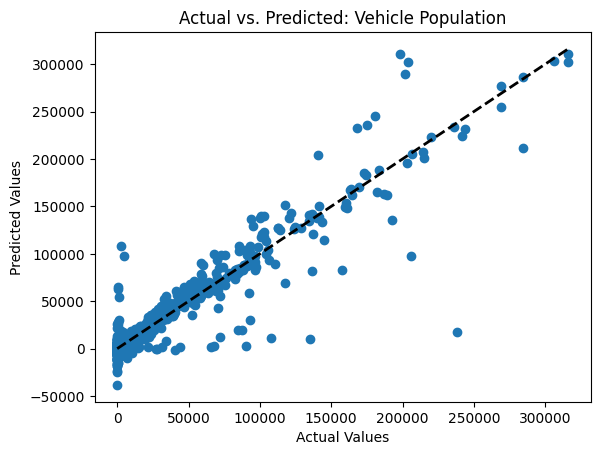

In [655]:
plt.scatter(y_scoring_actual, y_scoring_pred)
plt.plot([min(y_scoring_actual), max(y_scoring_actual)],
         [min(y_scoring_actual), max(y_scoring_actual)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted: Vehicle Population')
plt.show()


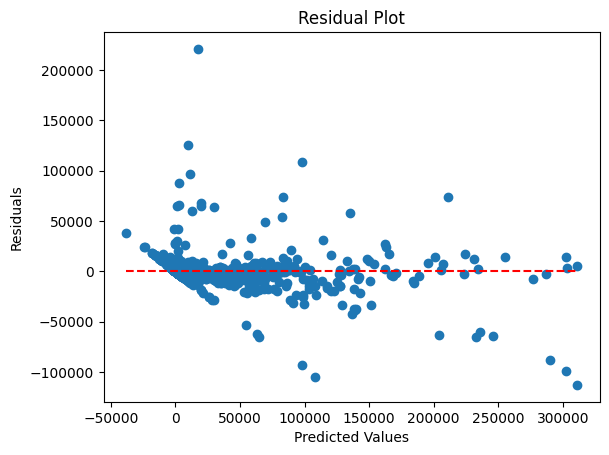

In [656]:
residuals = y_scoring_actual - y_scoring_pred

plt.scatter(y_scoring_pred, residuals)
plt.hlines(y=0, xmin=min(y_scoring_pred), xmax=max(y_scoring_pred), colors='r', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


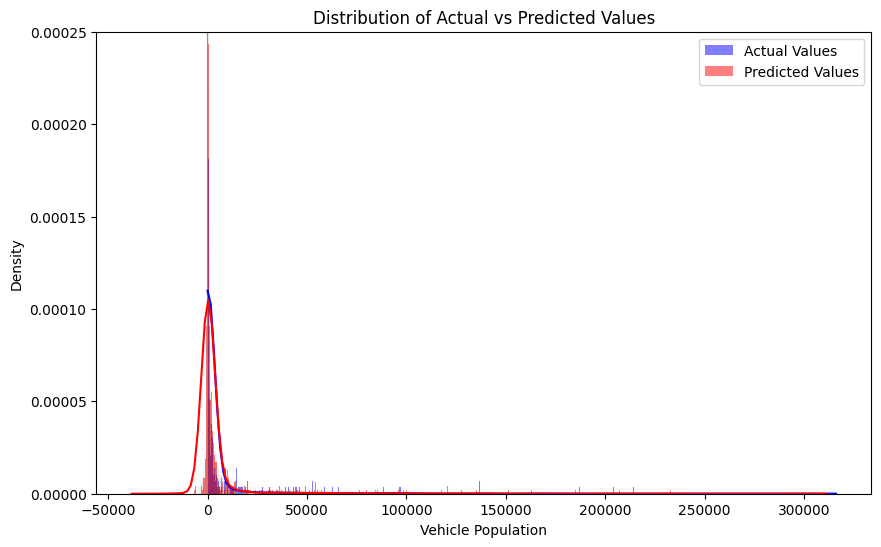

In [657]:
plt.figure(figsize=(10, 6))
sns.histplot(y_scoring_actual, color='blue', kde=True, label='Actual Values', stat='density')
sns.histplot(y_scoring_pred, color='red', kde=True, label='Predicted Values', stat='density')
plt.legend()
plt.title('Distribution of Actual vs Predicted Values')
plt.ylim(0, 0.00025)
plt.show()
